In [1]:
import importlib
from bpeck.mcao import act_study, lgs_study, utils
from paarti.utils import maos_utils

In [1]:
import maosi

In [5]:
m_tiptilt = 8
integration_time = 1/1500

tt_snr_all, tt_nearecon_all, tt_siglev_all, tt_bkgrnd_all = maos_utils.keck_nea_photons(m=m_tiptilt, wfs='STRAP', wfs_int_time=integration_time)
print(tt_siglev_all)


128116.74578592723


In [22]:
def calc_side(act_start, act_stop, act_step, sigfigs=3):
    '''
    Calculate the distance (in meters) between actuators 
    on the primary mirror for Keck. Known as dm.dx in MAOS, needed for 
    updated keck_nea_photons_any_config. Assumes 11 meter diameter
    telescope. 

    Inputs:
    -------
        act_start(float): Least number of actuators
        act_stop(float) : Most number of actuators, exclusive
        act_step(float) : Steps between each calculation
        sigfigs(float)  : Number of sigfigs to be included (optional)
    Outputs:
    --------
        sides(list)     : Calculated dm.dx value
        actuators(list): Associated actuator values
    '''
    # Generate list actuators
    actuators = list(np.arange(act_start, act_stop, act_step))

    # Calculate the side length per suberapture based on actuator count
    sides = [np.round(11 / (2 *((actuator_count/np.pi)**0.5)), sigfigs)
             for actuator_count in actuators]
    return sides, actuators

In [23]:
calc_side(act_start=4000, act_stop=5000, act_step=1000, sigfigs=3)

([0.154], [4000])

In [24]:
import numpy as np

def calc_side(actuator_count, sigfigs=3):
    print(f"calc_side, actuator_count = {actuator_count}")
    # Calculates the distance (in meters) between actuators on primary mirror
    # Known as dm.dx in MAOS configuration files
    # Needed for keck_nea_photons_any_config in PAARTI
    # Assume 11 meter diameter telescope (Keck parameters)

    # Calculate the side length per suberapture based on actuator count
    print(actuator_count)
    side_value_unround = 11 / (2 * ((actuator_count/np.pi)**0.5)
    side_value = np.round(side_value_unround, sigfigs)
    print(f"calc_side, side_value = {side_value}")

    return side_value

calc_side(4000, sigfigs=3)

calc_side, actuator_count = 4000
4000
calc_side, side_value = 196.254


196.254

In [8]:
n_dms = 2
side_dms = [.154, .154]
side_asm = .218

In [10]:
def create_dm_dx_array(n_dms, side_dms, side_asm):
    if n_dms == len(side_dms):
        return ' '.join(map(str, [side_asm] + side_dms))
    elif n_dms != len(side_dms):
        raise ValueError("Number of deformable mirrors (n_downstream_dms) does not match number of distances between actuators (side_actuator_downstream_dms).")

create_dm_dx_array(n_dms=n_dms, side_dms=side_dms, side_asm=side_asm)


'0.218 0.154 0.154'

In [2]:
importlib.reload(act_study)
importlib.reload(lgs_study)
importlib.reload(utils)

<module 'bpeck.mcao.utils' from '/u/bpeck/code/bpeck/bpeck/mcao/utils.py'>

In [3]:
#act_study.print_mag_to_flux(2000, 6000, 1000, 7, 8)

In [4]:
lgs_study.calculate_radius(8,15)

TypeError: calculate_radius() missing 1 required positional argument: 'type'

In [3]:
#powfs.siglev=[207.178 42388 41557970.926]
#powfs.bkgrnd = [ 0.1 1.056 1124.183 ]
#powfs.nearecon=[104.3 0.269 0.076]

In [5]:
importlib.reload(act_study)

<module 'bpeck.mcao.act_study' from '/u/bpeck/code/bpeck/bpeck/mcao/act_study.py'>

In [ ]:
act_study.print_calc_side(2000, 6000, 1000)

In [15]:
act_study.print_calc_side(2000, 6000, 1000)
act_study.print_mag_to_flux(2000, 6000, 1000, 7, 8)

--------------------
Distance between actuators relative to primary mirror (m), dm.dx:
--------------------
       2000       0.218 

       3000       0.178 

       4000       0.154 

       5000       0.138 

[0.218, 0.178, 0.154, 0.138]
[165.278, 110.19, 82.479, 66.231]
[42387.592, 42387.592, 42387.592, 42387.592]
--------------------
VisMCAO Magnitude-to-Flux Parameters:
--------------------

####
#7mag LGS (8mag TT)
####
#Actuator Count: 2000
#dm.dx = [ 0.218 .168 .168 ]
#powfs.siglev = [ 165.278 42387.592 41.558 ]
#powfs.bkgrnd = [ 0.1 1.056 0.001 ]
#powfs.nearecon = [ 118.869 0.269 202.516 ]

#Actuator Count: 3000
#dm.dx = [ 0.178 .168 .168 ]
#powfs.siglev = [ 110.19 42387.592 41.558 ]
#powfs.bkgrnd = [ 0.1 1.056 0.001 ]
#powfs.nearecon = [ 146.901 0.269 202.516 ]

#Actuator Count: 4000
#dm.dx = [ 0.154 .168 .168 ]
#powfs.siglev = [ 82.479 42387.592 41.558 ]
#powfs.bkgrnd = [ 0.1 1.056 0.001 ]
#powfs.nearecon = [ 171.319 0.269 202.516 ]

#Actuator Count: 5000
#dm.dx = [ 0.138 .

In [1]:
import matplotlib.pyplot as plt

In [25]:
actuators = [2000, 3000, 4000, 5000]

total_wfe = [110.1, 108.2, 110.3, 110.1]
high_order_wfe = [96.5, 94.2, 92.6, 93.0]
tt_wfe = [53.0, 53.3, 59.9, 58.9]
#total_wfe = [363.1, 362.5, 377.2, 372.1]
#high_order_wfe = [351.3, 349.8, 361.1, 358.1]
#tt_wfe = [91.6, 94.8, 109.3, 101.2]

In [26]:
#actuators = [2000, 3000, 4000, 5000]
#total_wfe_old = [398.6, 348.4, 372.2, 432.7]
#high_order_wfe_old = [371.4, 335.0, 353.9, 402.0]
#tt_wfe_old = [117.6, 95.7, 115.2, 160.1]
total_wfe_old = [128.4, 130.0, 134.1, 140.1]
high_order_wfe_old = [119.3, 120.3, 122.6, 124.3]
tt_wfe_old = [47.4, 49.0, 54.2, 64.6]

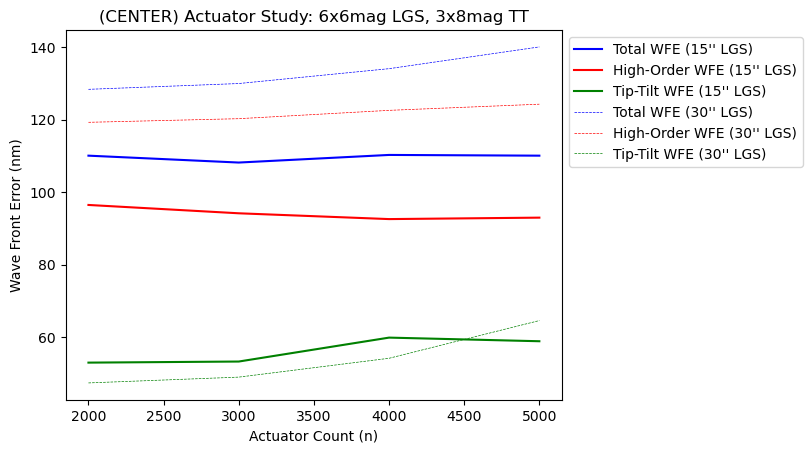

In [27]:
plt.plot(actuators, total_wfe, color = "blue", label = "Total WFE (15'' LGS)")
plt.plot(actuators, high_order_wfe, color = "red", label = "High-Order WFE (15'' LGS)")
plt.plot(actuators, tt_wfe, color = "green", label = "Tip-Tilt WFE (15'' LGS)")
plt.plot(actuators, total_wfe_old, color = "blue", label = "Total WFE (30'' LGS)", linestyle="dashed", linewidth=0.5)
plt.plot(actuators, high_order_wfe_old, color = "red", label = "High-Order WFE (30'' LGS)", linestyle="dashed", linewidth=0.5)
plt.plot(actuators, tt_wfe_old, color = "green", label = "Tip-Tilt WFE (30'' LGS)",linestyle="dashed", linewidth=0.5)
plt.xlabel("Actuator Count (n)")
plt.ylabel("Wave Front Error (nm)")
plt.title("(CENTER) Actuator Study: 6x6mag LGS, 3x8mag TT")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [44]:
import astropy.units as u
import astropy.constants as c
import numpy as np

In [45]:
sigma_T = np.sqrt(0.2) * u.m ** -3
n_b = 6.6 * (10 ** -29) * u.m ** 2
H_0 = 1.4 * 10 ** 10 * u.year
t_H = t_H.to(u.s)

In [46]:
num = 0.3
denom = (sigma_T**2) * (n_b**2) * (t_H**2) * (c.c ** 2)

In [47]:
answer = (num/denom)**1/3 - 1
answer 

<Quantity 6541.99701051>

In [1]:
import os

In [6]:
os.getcwd()
os.chdir("~/")

FileNotFoundError: [Errno 2] No such file or directory: '~/'

In [2]:
os.chdir("~/work/mcao/vismcao")

FileNotFoundError: [Errno 2] No such file or directory: '~/work/mcao/vismcao'

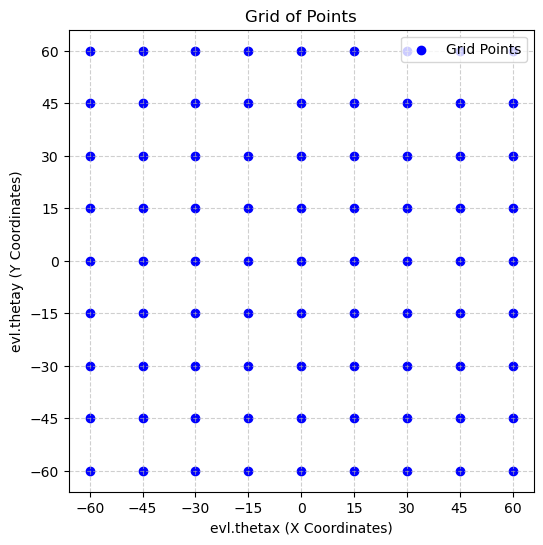

[-60, -60, -60, -60, -60, -60, -60, -60, -60, -45, -45, -45, -45, -45, -45, -45, -45, -45, -30, -30, -30, -30, -30, -30, -30, -30, -30, -15, -15, -15, -15, -15, -15, -15, -15, -15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 15, 15, 15, 15, 15, 15, 15, 15, 30, 30, 30, 30, 30, 30, 30, 30, 30, 45, 45, 45, 45, 45, 45, 45, 45, 45, 60, 60, 60, 60, 60, 60, 60, 60, 60]
[-60, -45, -30, -15, 0, 15, 30, 45, 60, -60, -45, -30, -15, 0, 15, 30, 45, 60, -60, -45, -30, -15, 0, 15, 30, 45, 60, -60, -45, -30, -15, 0, 15, 30, 45, 60, -60, -45, -30, -15, 0, 15, 30, 45, 60, -60, -45, -30, -15, 0, 15, 30, 45, 60, -60, -45, -30, -15, 0, 15, 30, 45, 60, -60, -45, -30, -15, 0, 15, 30, 45, 60, -60, -45, -30, -15, 0, 15, 30, 45, 60]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range and step size
x_range = np.arange(-60, 61, 15)
y_range = np.arange(-60, 61, 15)

# Create the grid of points
grid_points = [(x, y) for x in x_range for y in y_range]

# Extract x and y coordinates separately for plotting
evl_thetax = [point[0] for point in grid_points]
evl_thetay = [point[1] for point in grid_points]

# Plot the grid points
plt.figure(figsize=(6, 6))
plt.scatter(evl_thetax, evl_thetay, color='blue', label="Grid Points")
plt.xlabel("evl.thetax (X Coordinates)")
plt.ylabel("evl.thetay (Y Coordinates)")
plt.title("Grid of Points")
plt.xticks(x_range)
plt.yticks(y_range)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Extract x and y coordinates for each row
evl_thetax = []
evl_thetay = []

for x in x_range:
    evl_thetax.extend([x] * len(y_range))
    evl_thetay.extend(y_range)

# Display the formatted x and y coordinate lists
print(evl_thetax)
print(evl_thetay)